CODE BLOCK: 1

In [13]:
import torch
from model import Net
import torch.optim as optim
import torch.nn as nn

CODE BLOCK: 2

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'device is  {device}')

device is  cpu


In [15]:
from torchvision import datasets, transforms

## Train data transformations
# we are using center crop of 22 and then resizing it to 28
train_transforms = transforms.Compose([transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),\
transforms.Resize((28, 28)),\

# we are using random rotation of 15 degrees
transforms.RandomRotation((-15., 15.), fill=0),\
# we are tranforming the image to tensor so that we can use it on gpu and then normalizing it
transforms.ToTensor(),\
transforms.Normalize((0.1307,), (0.3081,))])

# Test data transformations
# we have not applied center crop and random rotation on test data as we want to maximum information possible and we dont want to change the test data
test_transforms = transforms.Compose([transforms.ToTensor(),\
                                        transforms.Normalize((0.1307,), (0.3081,))])

CODE BLOCK: 4

In [16]:
# it will download out train and test data
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

CODE BLOCK: 5

In [17]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# dataloader for train and test data
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [18]:
from utils import plot_images,plot_losses


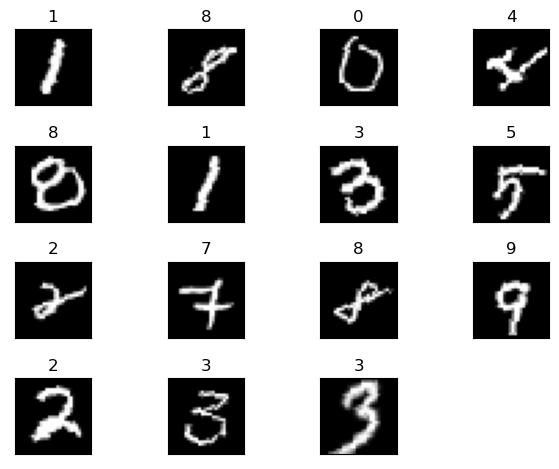

In [19]:
data, label= next(iter(train_loader))
plot_images(data, label, 15)


CODE BLOCK: 7

In [20]:
from torchsummary import summary

model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 10

In [21]:
from utils import train_model, test_model

In [22]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [23]:


model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 4

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_losses,train_acc=train_model(model, device, train_loader, optimizer, criterion,train_losses=train_losses, train_acc=train_acc)
  test_losses,test_acc= test_model(model, device, test_loader, criterion,test_losses=test_losses, test_acc=test_acc)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3001 Batch_id=117 Accuracy=55.03: 100%|██████████| 118/118 [02:01<00:00,  1.03s/it]


Test set: Average loss: 0.0004, Accuracy: 9373/10000 (93.73%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 2


Train: Loss=0.1463 Batch_id=117 Accuracy=93.69: 100%|██████████| 118/118 [02:15<00:00,  1.15s/it]


Test set: Average loss: 0.0002, Accuracy: 9669/10000 (96.69%)

Adjusting learning rate of group 0 to 2.5000e-03.


CODE BLOCK: 11

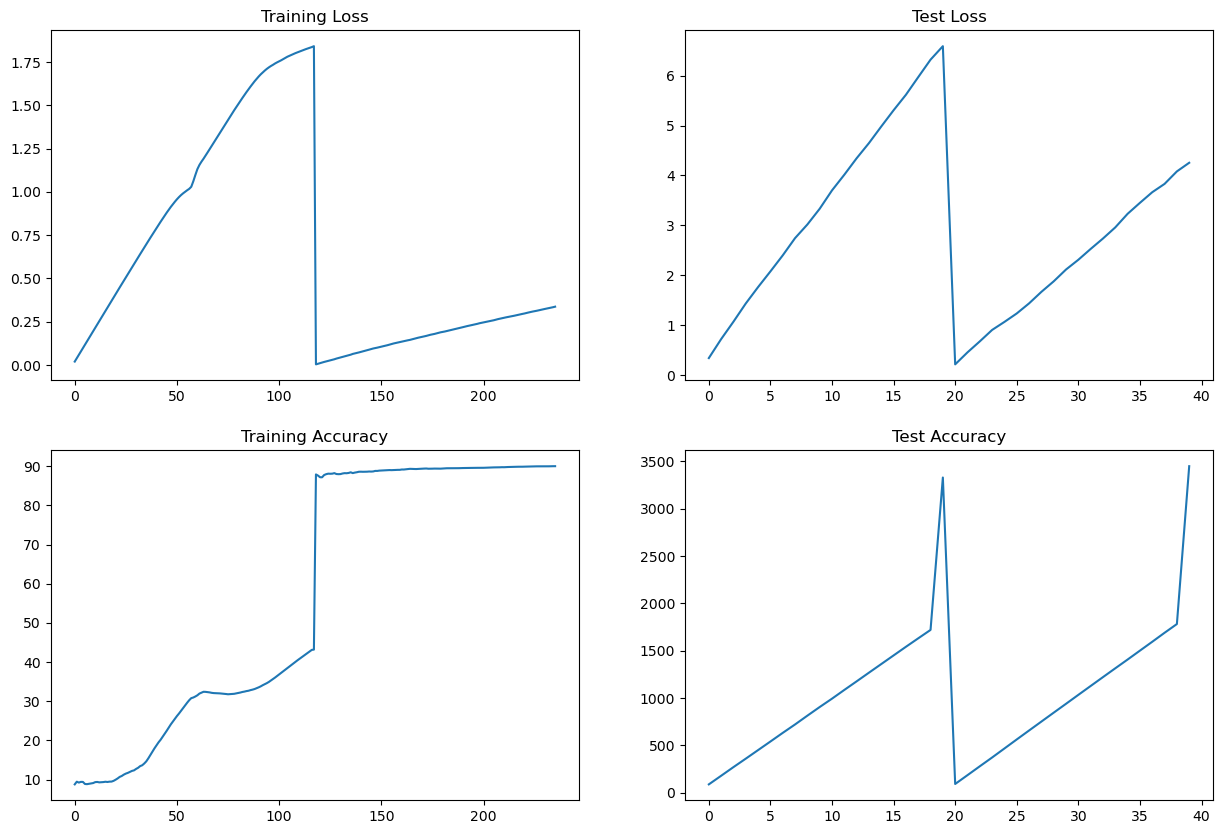

In [12]:
from utils import plot_losses
plot_losses(train_losses, train_acc, test_losses, test_acc)